# **Insper - Eletromagnetismo e Ondulatória** #

<p style='text-align: justify;'>Uma das tecnologias mais utilizadas para a transferência de energia pelo ar – WPT (Wireless Power Transfer) – consiste no chamado “acoplamento ressonante por campos próximos – near field ressonant coupling”. Como há duas bobinas (uma transmissora e outra receptora), o fenômeno da transmissão de energia pelo ar se assemelha bastante ao funcionamento de um transformador convencional. Exatamente por isso, e para nossa sorte, é possível utilizar o modelo elétrico do transformador para simular um circuito WPT.</p>


<p style='text-align: justify;'>Uma importante diferença entre um transformador com núcleo de ferro e um outro sem esse núcleo (como no caso da transmissão pelo ar) é que a intensidade do campo magnético produzido pela bobina primária, por exemplo, não será igual à intensidade do campo magnético no interior da bobina secundária, hipótese que usamos para construir o modelo do transformador. Contudo, a engenharia é conhecida exatamente pela engenhosidade das soluções encontradas, não é mesmo?
Em um transformador convencional, a indutância mútua é calculada usando $M=\sqrt {L_1\cdot L_2}$. A definição de indutância mútua consiste na razão entre o fluxo magnético total em uma bobina e a corrente na outra. Ora, se apenas parte do fluxo magnético produzido por uma das bobinas chega à outra, nada mais simples do que considerar um “fator de acoplamento k”, de tal modo que $M=k\cdot \sqrt {L_1\cdot L_2}$. Esse fator de acoplamento pode variar entre 0 e 1, sendo 1 apenas quando há um núcleo de ferro entre as bobinas.</p>

Mesmo sem sabermos a relação entre $k$ e a distância entre as bobinas, sabemos, intuitivamente, que quanto maior a distância, menor será o $k$.



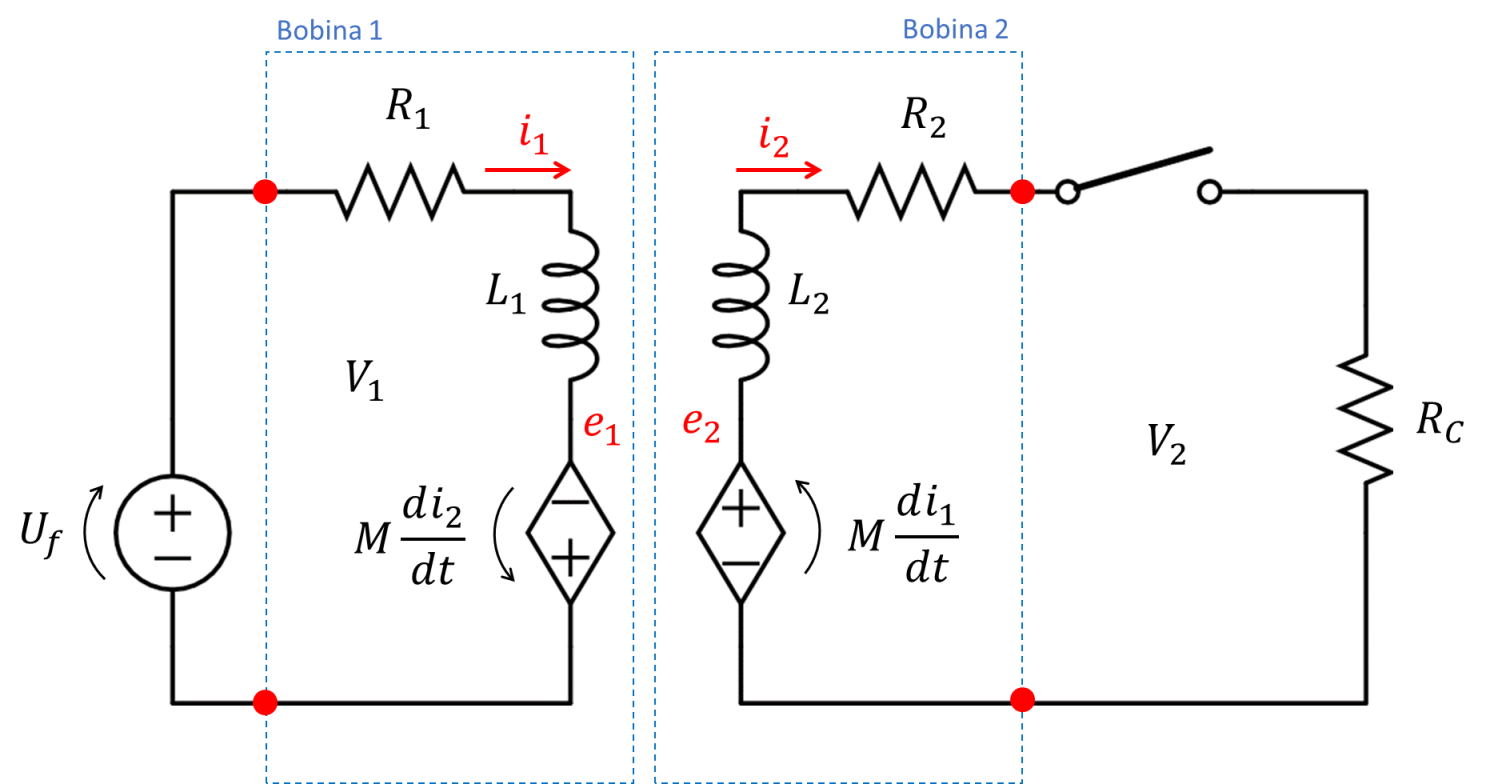
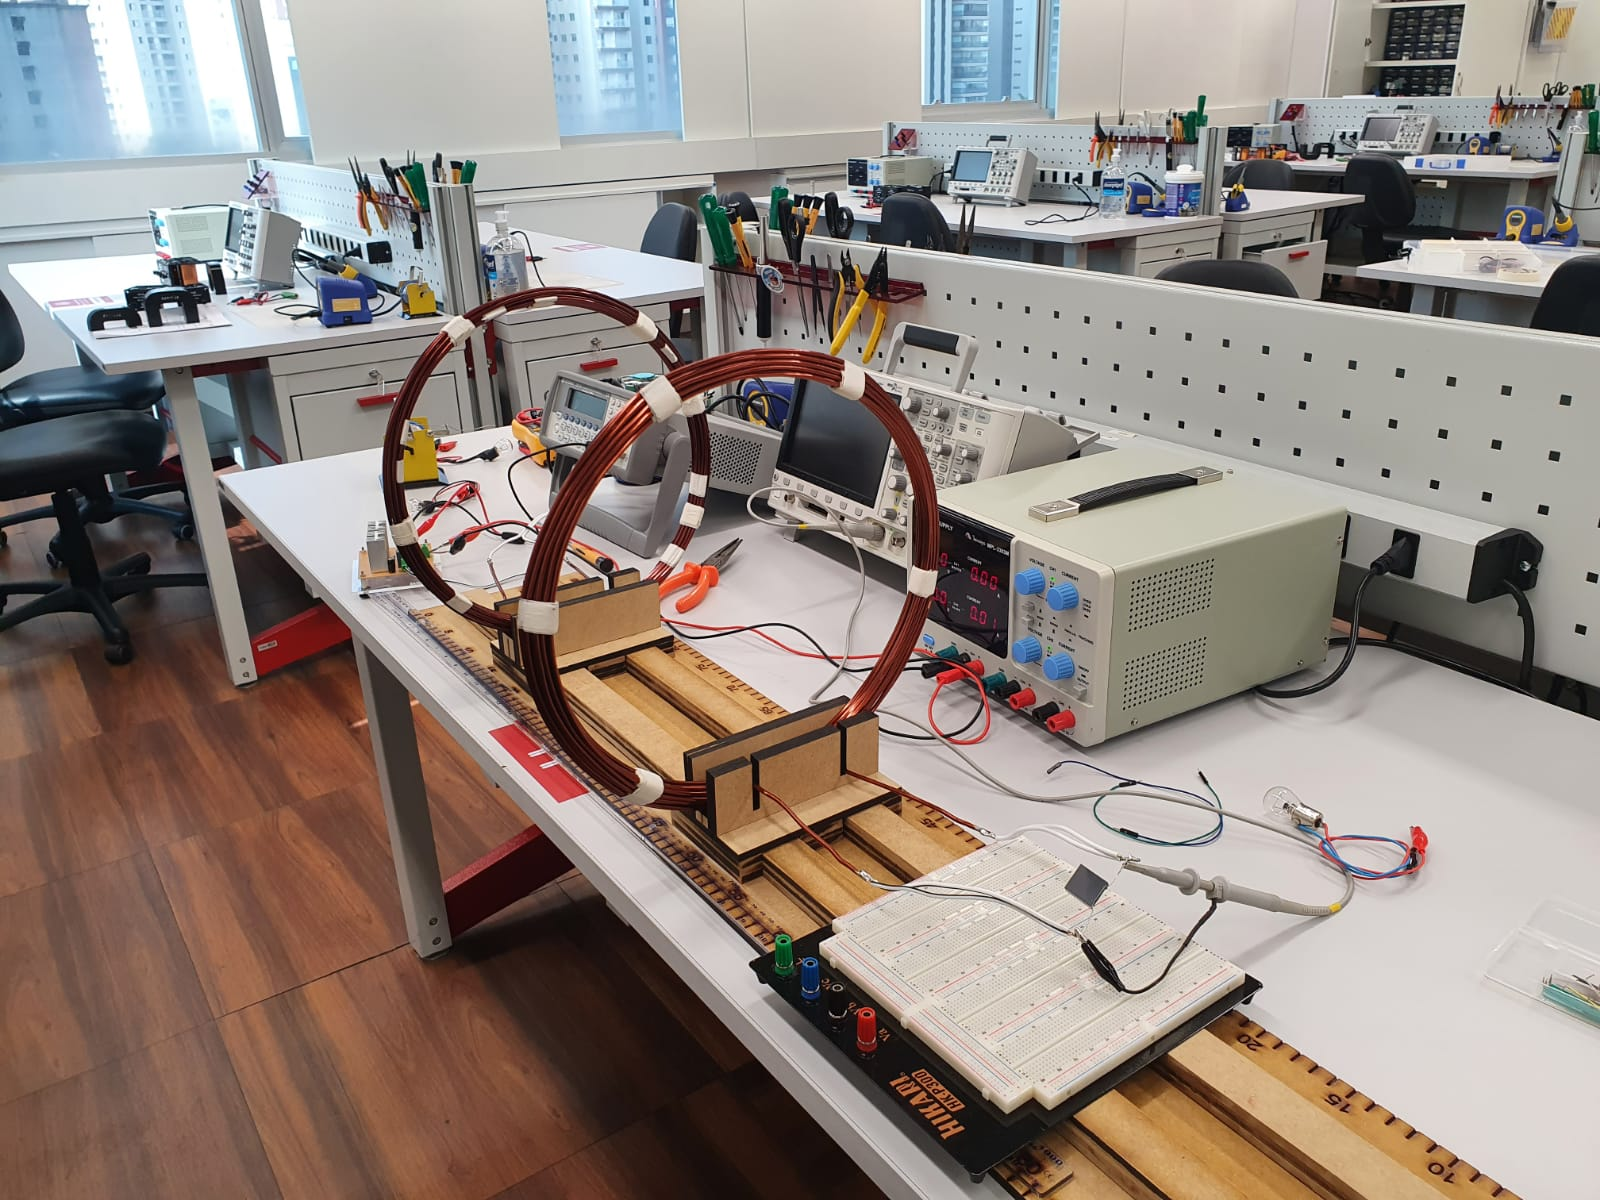

a) Importe os módulos necessários

In [17]:
#Vamos importar os módulos que precisamos
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

#diametro da bobina vai ser forcado --  25cm de diametro
#capacitor de 4.7uf

Declarando as variáveis  do sistema, ajustadas para nosso experimento.

In [18]:
#implemente seu código aqui
RC = 400
r1 = 875.5*10**-3
r2 = 876.5*10**-3



# F = 60
L1 = 203.3 * 10**-6
L2 = 228.4 * 10**-6
C1 = 0.47 *10 **-6
C2 =C1

wRef = sqrt(1/(L1*C1))
fRef = wRef/(2*pi)
fRef
V1 = (2/np.pi)*5
print(fRef)


(16281.803660500243+0j)


Criando funções que recebem as variáveis do nosso sistema, a constante de acoplamento e a frequência angular e devolvem as correntes I1, I2 e IC.

In [19]:


def CalcularTransformador(xl1,xl2,xc1,xeq,xm):
    Z=np.array([[r1+xl1+xc1,-xm],[-xm, xl2+r2+xeq]])
    V=np.array([V1,0])
    I=np.dot(linalg.inv(Z),V)
    return I[0], I[1]

def calcular_correntes(w,K):
    xl1 = 1j *w *L1
    xl2 =  1j *w *L2
    xc1 = 1/(1j*w*C1)
    xc2 = 1/(1j*w*C2)
    M = K*(L1*L2)**0.5
    xm = 1j *w * M
    xeq = (RC/(RC*xc2*w*1j+1))
    I1,I2 = CalcularTransformador(xl1,xl2,xc1,xeq,xm)
    IC = (I2*xc2)/(RC+xc2)
    return I1,I2,IC

Criando funções para calcular potência e calcular as listas de I1, I2 e IC para todas as frequências.


In [20]:

def potencia(V,I):
    return ((V/sqrt(2))*(I.conjugate()/sqrt(2)))

def calcular_listas(K):
    lista1 = []
    lista2 = []
    lista_f = []
    lista_v2 = []
    lista_Ic = []
    lista_p_entrada = []
    lista_p_saida = []
    lista_eficiencia = []
    for w in range(1,3*80000,1):
        V1 = 5
        I1,I2,IC = calcular_correntes(w,K)

        lista1.append(I1)
        lista2.append(I2)
        lista_f.append(w/(2*pi))

        V2 = IC*RC

        lista_v2.append(V2)
        lista_Ic.append(IC)

        p_ent = potencia(I1,V1)
        p_sai = potencia(IC,V2)

        lista_p_entrada.append(p_ent.real)
        lista_p_saida.append(p_sai.real)
        lista_eficiencia.append((p_sai/p_ent).real*100)
    return lista1,lista2,lista_f,lista_v2,lista_Ic,lista_p_entrada,lista_p_saida,lista_eficiencia
       
    


Variando a frequência e calculando I1,I2 e a potência para diversas frequências.

------------------------PARA K = 0.0 ---------------------------


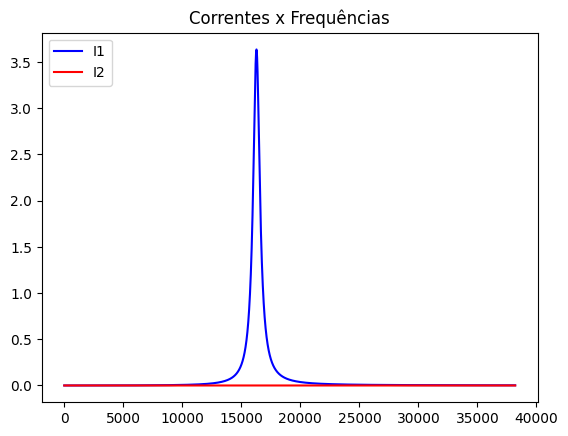

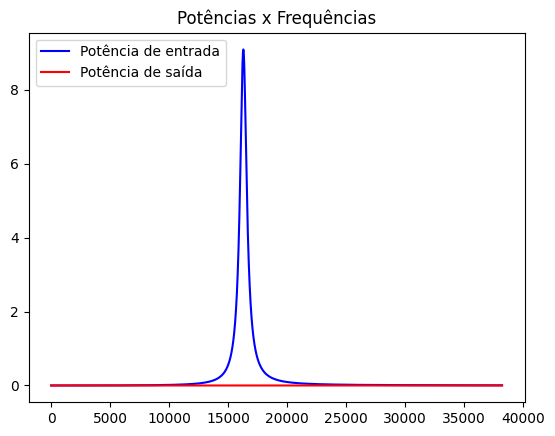

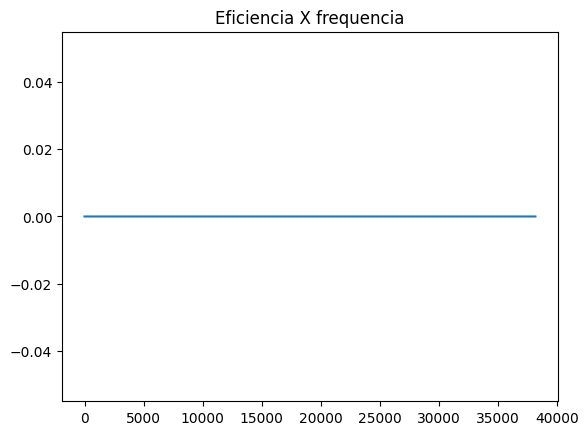

maior corrente 1 (3.6357495672949636-0.0006930769615378606j)
maior corrente 2 0j
frequência de maior I1: 16281.868988187078
frequência de maior I2: 0.15915494309189535
frequência de maior eficiência: 0.15915494309189535
maior tensão na carga (v2): (-0+0j)
maior corrente na carga: (-0+0j)
------------------------PARA K = 0.25 ---------------------------


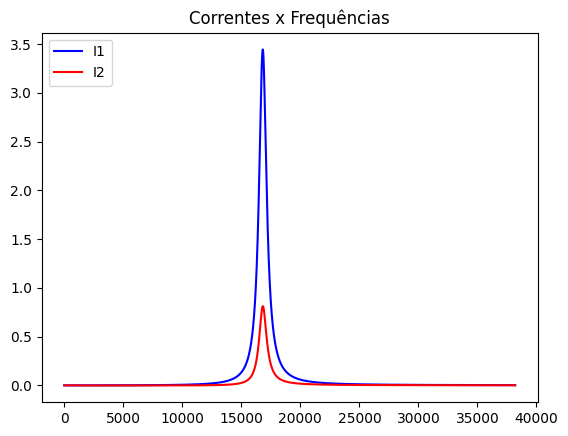

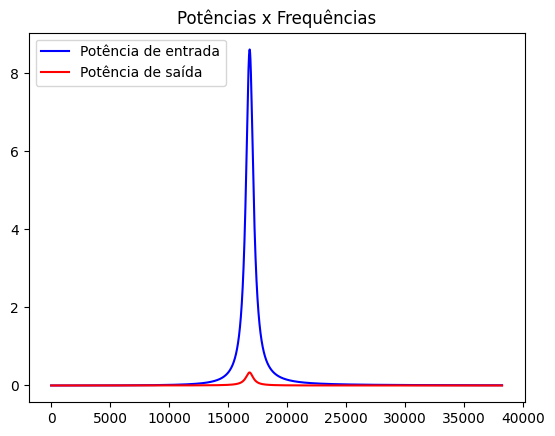

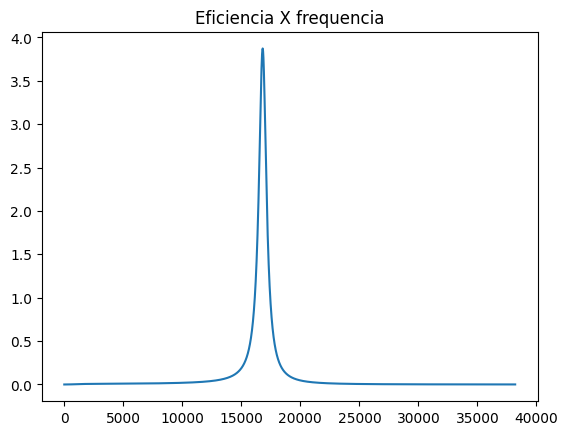

maior corrente 1 (3.444178446426326-1.8170833987361396e-05j)
maior corrente 2 (0.8115535750892265+0.014726631465355518j)
frequência de maior I1: 16815.038047544927
frequência de maior I2: 16822.04086504097
frequência de maior eficiência: 16806.284525674873
maior tensão na carga (v2): (9.075616890462534-8.09910334329212j)
maior corrente na carga: (0.022689042226156336-0.0202477583582303j)
------------------------PARA K = 0.5 ---------------------------


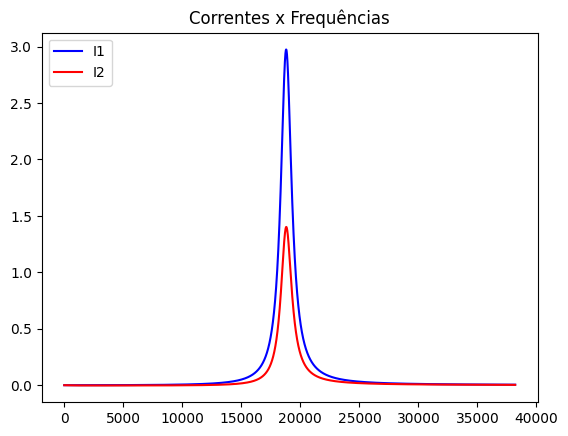

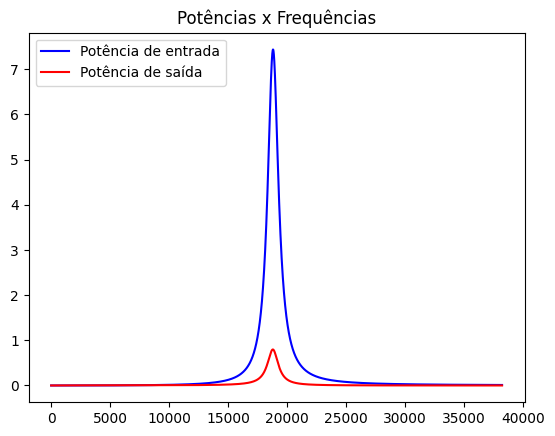

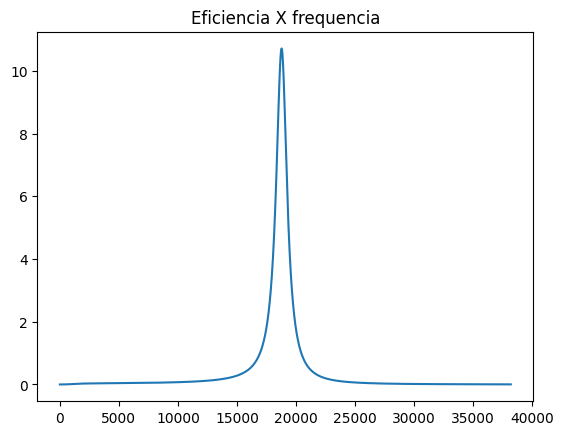

maior corrente 1 (2.973917436536532-4.8851024098937205e-05j)
maior corrente 2 (1.4017679268260559+0.02273064823354236j)
frequência de maior I1: 18797.312863754483
frequência de maior I2: 18806.384695510722
frequência de maior eficiência: 18780.760749672925
maior tensão na carga (v2): (14.005020847700203-12.513715855224367j)
maior corrente na carga: (0.03501255211925051-0.031284289638060916j)
------------------------PARA K = 0.75 ---------------------------


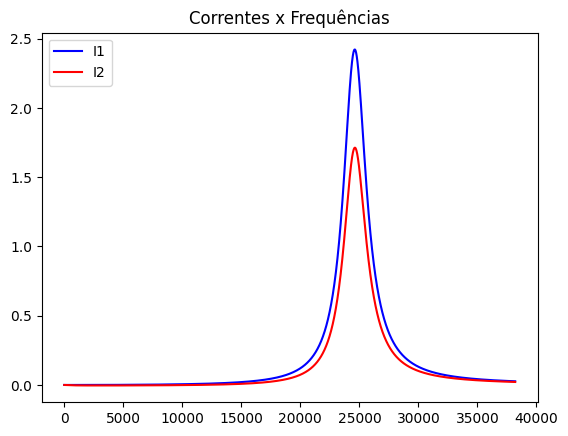

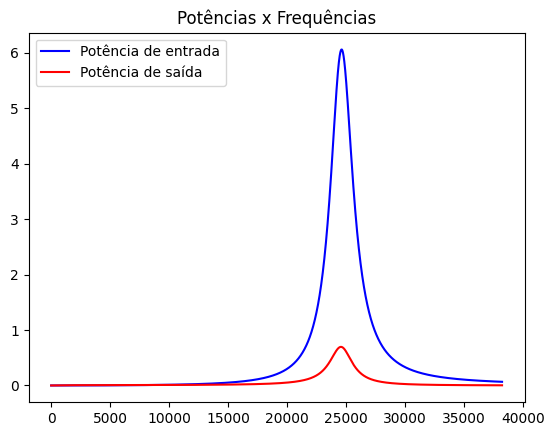

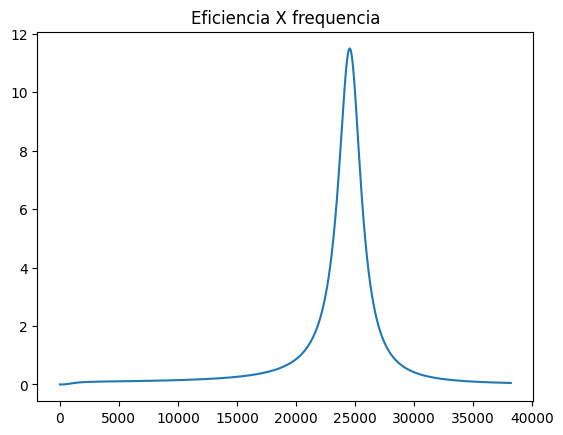

maior corrente 1 (2.422302861296393+9.167144552706691e-05j)
maior corrente 2 (1.7132070755150384+0.021227980330951673j)
frequência de maior I1: 24605.99082177939
frequência de maior I2: 24620.633076543843
frequência de maior eficiência: 24549.80912686795
maior tensão na carga (v2): (13.102692272969582-11.676721997100682j)
maior corrente na carga: (0.032756730682423955-0.029191804992751706j)


In [21]:
#implemente seu código aqui
lista_k = np.arange(0,1,0.25)
for k in lista_k:
    print("------------------------PARA K = {} ---------------------------".format(k))
    lista1,lista2,lista_f,lista_v2,lista_Ic,lista_p_entrada,lista_p_saida,lista_eficiencia = calcular_listas(k)
    I1 = (max(lista1))
    I2 = (max(lista2))

    freqRef = wRef/(2*np.pi)
    freqRef = freqRef.real

    plt.title("Correntes x Frequências")
    plt.plot(lista_f,lista1,"-b",label="I1")

    # plt.axis([freqRef*0.8,freqRef*1.2,0,5])

    plt.plot(lista_f,lista2,"-r",label="I2")
    plt.legend(loc="upper left")
    plt.show()

    plt.title("Potências x Frequências")

    plt.plot(lista_f,lista_p_entrada,"-b",label="Potência de entrada")
    plt.plot(lista_f,lista_p_saida,"-r",label="Potência de saída")
    plt.legend(loc="upper left")
    # plt.axis([freqRef*0.8,freqRef*1.2,0,20])

    plt.show()


    plt.title("Eficiencia X frequencia")
    plt.plot(lista_f,lista_eficiencia)
    # plt.axis([freqRef*0.8,freqRef*1.2,0,100])
    plt.show()





    index1 = (lista1.index(I1))
    index2 = (lista2.index(I2))
    freqMaiorEficiencia = lista_f[lista_eficiencia.index(max(lista_eficiencia))]

    print("maior corrente 1 {}".format(I1))
    print("maior corrente 2 {}".format(I2))
    print("frequência de maior I1: {}".format(lista_f[index1]))
    print("frequência de maior I2: {}".format(lista_f[index2]))
    print("frequência de maior eficiência: {}".format(freqMaiorEficiencia))
    print("maior tensão na carga (v2): {}".format(max(lista_v2)))
    print("maior corrente na carga: {}".format(max(lista_Ic)))




Variando K entre 0 e 1 e mantendo a frequência constante igual a 19k (valor maior que a frequência de ressonância).

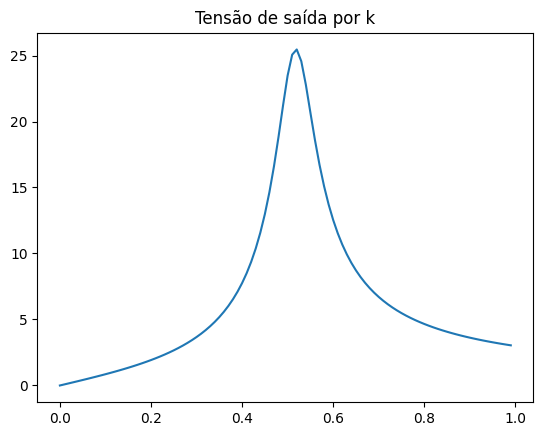

In [22]:
# w = freqMaiorEficiencia*2*np.pi
# w = 1000*2*np.pi
# for f in range(1,20000,1000):
#     w = 2*np.pi*f
#     lista_k = np.arange(0,1,0.01)
#     lista_v2 = []
#     for k in lista_k:
#         I1,I2,IC = calcular_correntes(w,k)
#         V2 = IC*RC
#         lista_v2.append(V2)
f = 19*10**3
w = 2*np.pi*f

lista_v2 = []
lista_k = np.arange(0,1,0.01)
for k in lista_k:
    I1,I2,IC = calcular_correntes(w,k)
    V2 = IC*RC
    lista_v2.append(abs(V2))

plt.plot(lista_k,lista_v2,label="f={}".format(f))
plt.title("Tensão de saída por k")
plt.show()